In [1]:
import requests
import pandas as pd
from plotly import offline
import plotly.express as px
import numpy as np

In [2]:
url ="https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=09#page-1"
tablo = pd.read_html(requests.get(url).text)[2]

C:\Users\Cuneyt\AppData\Local\Temp\ipykernel_19452\3165387930.py:2: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [3]:
def takas_baslangic(stock):
    if stock in takas.index:
        return round(takas.loc[stock][0],2)
    else:
        return 0
def takas_bitis(stock):
    if stock in takas.index:
        return round(takas.loc[stock][-1],2)
    else:
        return 0

In [4]:
takas =pd.read_excel("takas.xlsx").set_index("TARIH").transpose()

In [5]:
sektor = pd.DataFrame({"Hisse":tablo["Kod"],"Sektör":tablo["Sektör"],"Piyasa Değeri(mn $)":tablo["Piyasa Değeri (mn $)"]})

In [6]:
main_data = pd.read_html(url)

In [7]:
temel_analiz = pd.DataFrame({"Hisse":main_data[6]["Kod"],"F/K":main_data[6]["F/K"],"PDDD":main_data[6]["PD/DD"]})

In [8]:
second_tablo = pd.read_html(requests.get(url).text)[7]

C:\Users\Cuneyt\AppData\Local\Temp\ipykernel_19452\2200440582.py:1: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [9]:
getiri =pd.DataFrame({"Hisse":second_tablo["Kod"],"Getiri":second_tablo["Günlük Getiri (%)"]/100})

In [10]:
df =pd.merge(sektor,getiri,on="Hisse")
df = pd.merge(df,temel_analiz,on="Hisse")
df["TAKAS_BASLANGIC"]=df["Hisse"].apply(takas_baslangic).astype(float)
df["TAKAS_SON"]=df["Hisse"].apply(takas_bitis).astype(float)
df["TAKAS_FARK"]=(df["TAKAS_SON"]-df["TAKAS_BASLANGIC"]).astype(float)

C:\Users\Cuneyt\AppData\Local\Temp\ipykernel_19452\3647668305.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Cuneyt\AppData\Local\Temp\ipykernel_19452\3647668305.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [11]:
df.shape

(544, 9)

In [12]:
df["PDDD"] = round(df["PDDD"].apply(lambda x:x if x != "A/D" else np.nan).astype(float)/10,2)
df["F/K"] = round(df["F/K"].apply(lambda x:x if x != "A/D" else np.nan).astype(float)/10,2)

In [13]:
df["Piyasa Değeri(mn $)"]=df["Piyasa Değeri(mn $)"].str.replace(".","").str.replace(",",".").astype(float)

In [14]:
null_items= df[df["TAKAS_BASLANGIC"].isnull()].index
df.drop(index=null_items,inplace=True)
df.drop(df[df["TAKAS_SON"]<3].index,inplace=True)
df.drop(df[df["TAKAS_FARK"]<1].index,inplace=True)
df.shape
#takas.loc[stock][-1]-

(58, 9)

In [15]:
def define_color(stock):
    diff = df[df["Hisse"]==stock]["TAKAS_FARK"].values[0]
    
    if diff>8:
        return "green"
    if diff>6:
        return "lime"
    if diff>4:
        return "lightgreen"
    if diff>3:
        return "lightpink"
    if diff>2:
        return "indianred"
    else:
        return "red"

In [17]:
df["Renk"]=df["Hisse"].apply(define_color)

In [18]:
df[df["TAKAS_FARK"]==df["TAKAS_FARK"].max()]

,Hisse,Sektör,Piyasa Değeri(mn $),Getiri,F/K,PDDD,TAKAS_BASLANGIC,TAKAS_SON,TAKAS_FARK,Renk
518,VBTYZ,Teknoloji,1037.0,2.8,25.6,10.1,1.65,20.94,19.29,green


In [27]:
fig=px.treemap(df,path=[px.Constant("BIST"),"Renk","Hisse"],
               values="TAKAS_FARK",
               color="Renk",
               custom_data=["Getiri","Sektör","F/K","PDDD","TAKAS_BASLANGIC","TAKAS_SON"],
               color_discrete_map={"(?)":"#ADD8E6","red":"red","indianred":"indianred","lightpink":"lightpink","lightgreen":"lightgreen","lime":"lime","green":"green"}
              )

In [28]:
fig.update_traces(hovertemplate="<br><b>".join(["Hisse: %{label}",
                                                "Piyasa Değeri($): %{value}",
                                                "Son Gün Getiri: %{customdata[0]}",
                                                "Sektör:%{customdata[1]}",
                                                "F/K: %{customdata[2]}",
                                               "PD/DD: %{customdata[3]}",
                                               "TAKAS 3W ÖNCESİ: %{customdata[4]}",
                                               "TAKAS SON: %{customdata[5]}"]))

In [21]:
fig.data[0].texttemplate="<b>%{label}</b><br>%{customdata[0]} %"

In [22]:
offline.plot(fig,filename="grafik.html")

'grafik.html'

In [ ]:
df

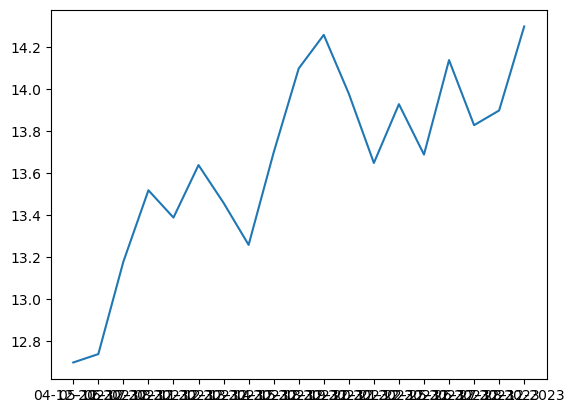

In [34]:
import matplotlib.pyplot as plt
plt.plot(takas.loc["ODAS"])